In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [7]:
# kp and des methods

sift = cv2.xfeatures2d.SIFT_create()
def siftKpAndDes(frame):
    return sift.detectAndCompute(frame,None)

surf = cv2.xfeatures2d.SURF_create()
def surfKpAndDes(frame):
    return surf.detectAndCompute(frame,None)
    

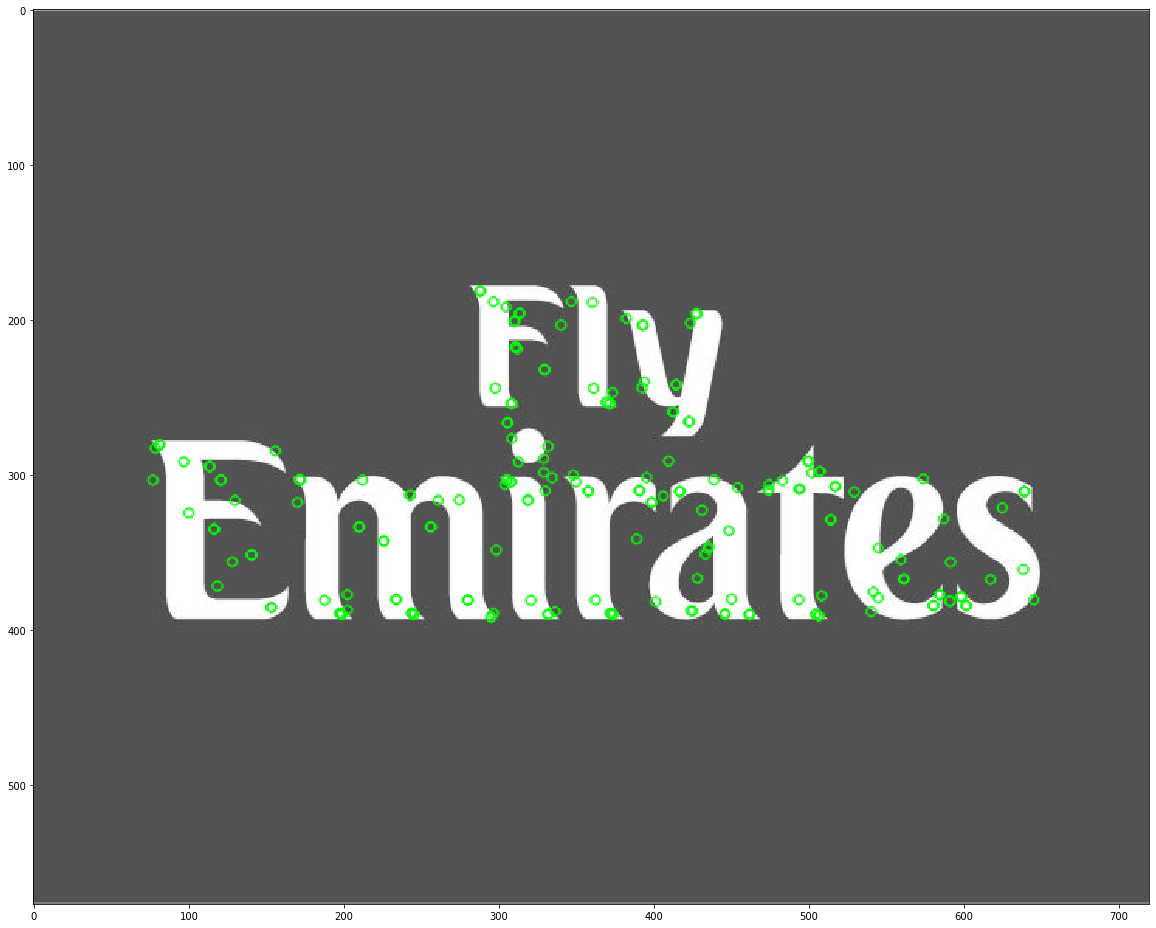

(<matplotlib.image.AxesImage at 0x1088cbd10>, None)

In [8]:
# preprocess kp/des for query image(s)

img1 = cv2.imread('logos/emirates.jpg',0)          # queryImage
# find the keypoints and descriptors with SIFT
kp1, des1 = siftKpAndDes(img1)

img1kps = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.figure(figsize=(20,20))
plt.imshow(img1kps), plt.show()

In [12]:
FRAME_INTERVAL = 5
FLANN_KDTREES = 5
SEARCH_CHECKS = 50
MIN_MATCH_COUNT = 10
LOWE_RATIO = 0.7 #lowered from 0.7 to derease sensitivity

cap = cv2.VideoCapture('videos/15brazil-5min.mp4')

while(True):
    for i in range(FRAME_INTERVAL):
        #skip i number of frames
        cap.grab()
        
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # find the keypoints and descriptors with SIFT
    kp2, des2 = siftKpAndDes(gray)
    
    # show only target image kps
#     img3 = cv2.drawKeypoints(gray, kp2, None, color=(0,255,0), flags=0)
#     cv2.imshow('frame',img3)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#     continue
    
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = FLANN_KDTREES)
    search_params = dict(checks = SEARCH_CHECKS)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < LOWE_RATIO*n.distance:
            good.append(m)
            
    if len(good)>MIN_MATCH_COUNT:
        print(len(good))
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

        if M is None:
            # if homography matrix is empty
            print("Empty homography matrix")
        else:
            print(M)
            matchesMask = mask.ravel().tolist()
            h,w = img1.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)

            # covert to color so homography line can be shown
            color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
            img3 = cv2.polylines(color,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)

    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None
        img3 = gray # display image without any lines
        
#     draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                        singlePointColor = None,
#                        matchesMask = matchesMask, # draw only inliers
#                        flags = 2)
#     img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

#     # Display the resulting frame
#     cv2.imshow('frame',gray)
    
    cv2.imshow('frame',img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

12
[[-4.91368735e-01 -3.70232631e+00  1.23547292e+03]
 [-1.25633983e-02 -1.48270368e-01  4.89141052e+01]
 [-3.93448430e-04 -2.99451351e-03  1.00000000e+00]]
Not enough matches are found - 7/10
Not enough matches are found - 10/10
Not enough matches are found - 3/10
Not enough matches are found - 3/10
11
[[ 1.09045263e-01 -3.00355756e+00  9.41279527e+02]
 [-2.93954732e-02 -3.08220000e-01  1.19605095e+02]
 [-1.55632132e-04 -2.67819239e-03  1.00000000e+00]]
Not enough matches are found - 1/10
Not enough matches are found - 9/10
14
[[-7.11547667e-01  1.05799190e+00  1.36364891e+02]
 [-1.44680175e-02  1.91640393e-01 -3.85300047e+01]
 [-9.96725507e-04 -1.09085500e-03  1.00000000e+00]]
Not enough matches are found - 2/10
Not enough matches are found - 7/10
12
[[-2.75277705e+00 -4.59044509e+00  2.92716756e+03]
 [-1.85057154e-02  1.95777208e+00 -3.61463282e+02]
 [ 7.72144026e-04 -6.75978959e-04  1.00000000e+00]]
Not enough matches are found - 8/10
Not enough matches are found - 7/10
Not enough 

37
[[ 2.29976618e-01  6.50312378e-02  1.00286651e+02]
 [-1.43943084e-02  3.65677386e-01  2.78693947e+02]
 [-4.48063468e-05  3.98748711e-04  1.00000000e+00]]
34
[[ 2.27683534e-01  7.97532054e-02  1.31490507e+02]
 [-2.54552843e-02  3.62164622e-01  2.55779412e+02]
 [-8.22391762e-05  3.94544863e-04  1.00000000e+00]]
29
[[-9.41055400e-02 -2.38909856e-01  1.84867884e+02]
 [-3.23431419e-01 -3.09040888e-01  2.93669953e+02]
 [-9.77982230e-04 -1.21252455e-03  1.00000000e+00]]
12
[[-6.20127302e-01 -2.39264719e-01  2.53832274e+02]
 [-6.36166340e-01 -3.13271726e-01  2.76989663e+02]
 [-2.33665331e-03 -1.08329327e-03  1.00000000e+00]]
18
[[-7.02181173e-01  2.05984866e-01  2.10697811e+02]
 [-8.81278090e-01  9.06311768e-02  2.92858923e+02]
 [-3.06194315e-03  4.27476381e-04  1.00000000e+00]]
21
[[4.02542205e-01 1.64883659e-01 2.14040095e+02]
 [8.40195080e-02 4.44799495e-01 1.72173590e+02]
 [3.29303603e-04 5.70275863e-04 1.00000000e+00]]
44
[[ 2.41963484e-01 -5.27930891e-03  2.28212690e+02]
 [-1.21723084

Not enough matches are found - 0/10
Not enough matches are found - 1/10
Not enough matches are found - 4/10
Not enough matches are found - 3/10
Not enough matches are found - 2/10
Not enough matches are found - 6/10
Not enough matches are found - 2/10
Not enough matches are found - 3/10
Not enough matches are found - 6/10
Not enough matches are found - 4/10
Not enough matches are found - 5/10
Not enough matches are found - 1/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 4/10
Not enough matches are found - 2/10
Not enough matches are found - 4/10
Not enough matches are found - 5/10
Not enough matches are found - 9/10
Not enough matches are found - 2/10
Not enough matches are found - 1/10
Not enough matches are found - 10/10
Not enough matches are found - 5/10
14
[[ 6.30646671e-01  2.84212033e-01 -3.27465299e+02]
 [-3.06675473e-01 -2.37332281e+00  6.84161376e+02]
 [-4.54049185e-04 -3.47177213e-03  1.00000000e+00]]
Not enough mat

Not enough matches are found - 2/10
Not enough matches are found - 8/10
Not enough matches are found - 2/10
Not enough matches are found - 10/10
Not enough matches are found - 10/10
Not enough matches are found - 4/10
Not enough matches are found - 3/10
Not enough matches are found - 4/10
Not enough matches are found - 4/10
Not enough matches are found - 9/10
Not enough matches are found - 4/10
Not enough matches are found - 0/10
Not enough matches are found - 7/10
Not enough matches are found - 3/10
12
[[-5.47106189e+00  1.21687707e+01 -5.32628764e+02]
 [-4.60140425e+00  6.95071931e+00  5.43284763e+02]
 [-8.47483513e-03  1.31285498e-02  1.00000000e+00]]
Not enough matches are found - 1/10
Not enough matches are found - 5/10
Not enough matches are found - 9/10
11
[[-4.87294173e-01 -2.20104991e+00  6.94647080e+02]
 [-3.79572719e-01 -2.44064111e+00  7.44200734e+02]
 [-4.78212593e-04 -3.39211225e-03  1.00000000e+00]]
Not enough matches are found - 6/10
Not enough matches are found - 2/10


16
[[ 2.72210597e-02  6.33077601e-02 -6.72677776e+00]
 [-8.87577429e-01 -2.39546413e+00  8.62544659e+02]
 [-9.25446037e-04 -2.79496910e-03  1.00000000e+00]]
17
[[-1.56778212e+00  2.31390231e+00  2.07081495e+02]
 [-5.30991407e-04  5.93770780e-01 -1.16302502e+02]
 [-2.09430075e-03  1.05726872e-03  1.00000000e+00]]
22
[[ 1.67093608e-01 -1.78011238e-02 -2.50876299e+00]
 [ 1.12619384e-01 -1.97799533e+00  7.29765208e+02]
 [ 6.07343648e-05 -2.48368219e-03  1.00000000e+00]]
12
[[-4.51152651e-01 -1.36109009e-02  2.12957553e+02]
 [-1.66219013e+00  7.72361457e-01  5.50827952e+02]
 [-2.68990736e-03  9.25501289e-04  1.00000000e+00]]
11
[[-1.65656432e-02 -8.51324155e-01  3.40875504e+02]
 [ 1.15331632e-01 -1.98093997e+00  7.34820043e+02]
 [ 1.98013720e-04 -2.69032902e-03  1.00000000e+00]]
Not enough matches are found - 10/10
Not enough matches are found - 8/10
Not enough matches are found - 6/10
13
Empty homography matrix
11
[[ 2.53999716e-01 -2.19059151e-02  3.44201195e-01]
 [-1.04770802e+01  1.6179

26
[[ 1.86329295e+00 -8.71402359e-01  1.21331239e+02]
 [ 6.26352058e-01  8.61655390e-01 -3.08259648e+02]
 [ 4.93217337e-03 -4.33894011e-03  1.00000000e+00]]
24
[[ 5.72384864e-01  2.75233115e-01 -4.36948200e+01]
 [-4.16155617e-02  7.63356539e-01 -1.70426361e+02]
 [ 1.40020351e-05  1.13753839e-03  1.00000000e+00]]
18
[[ 3.24612947e-01 -4.23588605e-02  1.00613518e+02]
 [-2.45038470e-02  4.36339318e-01 -1.22473277e+02]
 [-8.64123769e-05 -4.33012508e-04  1.00000000e+00]]
14
[[ 1.03102602e-01 -3.87834314e-02  5.64470699e+00]
 [-1.29086667e-02 -4.33281427e-02  1.96407189e+01]
 [-4.91931038e-04 -2.27261839e-03  1.00000000e+00]]
Not enough matches are found - 6/10
11
[[ 1.10422482e+00 -5.09461845e+00  1.18594197e+03]
 [ 2.93330840e-01 -1.40622277e+00  3.33687691e+02]
 [ 9.38106106e-04 -4.30828157e-03  1.00000000e+00]]
12
[[-1.25900419e+00 -1.46848466e+01  5.22466899e+03]
 [-1.70334353e+01  3.95719490e+01 -2.95082073e+03]
 [ 2.16653082e-02 -2.91502542e-02  1.00000000e+00]]
13
[[-4.00790842e-02 -

37
[[-1.20243839e-01 -2.28521949e+00  9.62612893e+02]
 [-3.97915874e-03 -5.27282981e-02  2.28481897e+01]
 [-1.37294825e-04 -2.36254263e-03  1.00000000e+00]]
15
[[-1.46158166e+00 -6.69768003e+00  1.65683126e+03]
 [-1.07396615e-02  3.28946666e-01 -1.46892135e+02]
 [ 3.84200098e-04 -6.90098625e-03  1.00000000e+00]]
14
[[-5.32566569e-01 -7.27083999e-01  5.66158717e+02]
 [-3.53226442e-02 -4.73521727e-02  3.70017064e+01]
 [-9.45210226e-04 -1.28115308e-03  1.00000000e+00]]
19
[[-3.54837608e+00  4.03938233e+00  5.83465663e+02]
 [-8.62405702e-02  4.27522135e-02  3.52472797e+01]
 [-6.07136093e-03  6.90386197e-03  1.00000000e+00]]
14
[[-5.82381540e-01  2.58800688e-04  3.26953187e+02]
 [-4.09679640e-01 -4.87773927e-01  3.25756648e+02]
 [-2.61492378e-03 -3.13244524e-04  1.00000000e+00]]
Not enough matches are found - 9/10
19
[[ 1.88849596e-01 -3.45496495e-02 -8.69759443e+01]
 [-6.81285787e-02  9.89780079e-02  3.99010261e+01]
 [-6.52807816e-04 -8.11678582e-04  1.00000000e+00]]
19
[[ 3.23768075e-01 -

-1